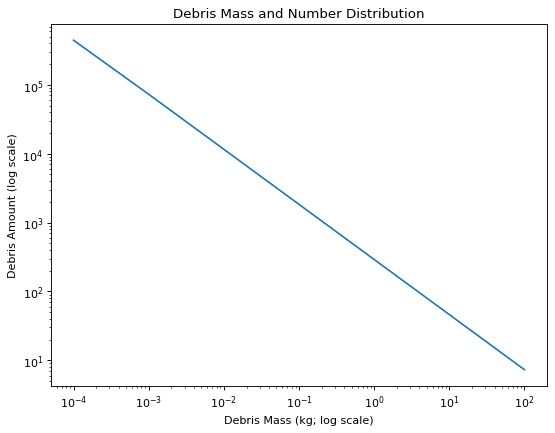

In [6]:
import numpy as np
import math
import matplotlib.pyplot as plt

v = 10000 #velocity
gamma_capital = v**2/80000
mass_impact = 689 #kg
mass_target = 900 #kg
gamma = 120 #experimental for v~ 10 km/sec

# non-catastrophic
if mass_impact < mass_target/gamma_capital:
  M_e = gamma*mass_impact

# catastrophic
if mass_impact >= mass_target/gamma_capital:
  M_e = mass_impact + mass_target

rho_small = 2000 #kg/m as alumninum is the most commonly used and is 2700 kg/m^3
rho_large = 500 #kg/m as large items have lower densities on composite basis
dm = 0.000005 #g taken as the minimum mass size 

m = np.zeros(7)
for i in range(7):
  m[i] = 0.0001*10**i

m_dist = 0.8*((m + dm)/M_e)**-0.8 # number of particles at mass m or greater 
for i in range(len(m)):
  if m[i]<0.1:
    rho = rho_small
    s = np.power((6*m/(np.pi*rho)),(1/2.26)) # size of particle of mass, m, from Eichler and Red power mass model, cited in Schall paper
  else:
    rho = rho_large
    s = np.power((6*m/(np.pi*rho)),(1/2.26)) # size of particle of mass, m, from Eichler and Red power mass model, cited in Schall paper

delta_V = np.exp(1.486 - 0.804*np.log(s) - 0.0676*np.log(s)**2) # empirical formula from Reynolds in m/s, most probable velocity selected here in a distribution from 0.1 to 1.3

fig = plt.figure(figsize=(8, 6), dpi=80)
ax = fig.add_subplot()
ax.plot(m,m_dist)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel("Debris Mass (kg; log scale)")
ax.set_ylabel("Debris Amount (log scale)")
ax.set_title("Debris Mass and Number Distribution")

plt.show()

In [7]:
mu_e = 3.986 * 10**14 # m^3/s
v = 1000
r = 720

a_pos = mu_e / ( v**2 + 2*v**2*delta_V)
a_neg = mu_e / ( v**2 - 2*v**2*delta_V)
# p = r
# e = ( r / a ) -1
# q = a ( 1 - e )
T = 2*np.pi*np.sqrt(a**3/mu_e)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in sqrt
  # Remove the CWD from sys.path while we load stuff.
